In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import final as fn
%matplotlib inline

In [193]:
# read data
pit = pd.read_csv('data/pit_stops.csv')
result = pd.read_csv('data/results.csv')
status = pd.read_csv('data/status.csv')
race = pd.read_csv('data/races.csv')
circuit = pd.read_csv('data/circuits.csv')
driver = pd.read_csv('data/drivers.csv')

In [196]:
pit

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8065,1052,832,2,37,19:09:53,24.341,24341
8066,1052,815,3,38,19:11:20,24.191,24191
8067,1052,830,2,39,19:12:13,23.848,23848
8068,1052,842,3,39,19:13:55,24.983,24983


In [197]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


In [198]:
driver

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [241]:
# merge data due to the pit stop data, we only analyze the current decade
temp = pd.merge(pit, race[['raceId','year','round','circuitId','name','date']], on='raceId', how='left')
temp = pd.merge(temp,result[['raceId','driverId','positionOrder', 'laps', 'time','statusId']], on=['raceId','driverId'], how = 'left', suffixes=('_pit', '_result'))
temp = temp.merge(status, on='statusId', how='left').merge(driver[['driverId', 'driverRef']], on = 'driverId', how='left')

In [242]:
temp

,raceId,driverId,stop,lap,time_pit,duration,milliseconds,year,round,circuitId,name,date,positionOrder,laps,time_result,statusId,status,driverRef
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,11,57,\N,11,+1 Lap,alguersuari
1,841,30,1,1,17:05:52,25.021,25021,2011,1,1,Australian Grand Prix,2011-03-27,19,19,\N,4,Collision,michael_schumacher
2,841,17,1,11,17:20:48,23.426,23426,2011,1,1,Australian Grand Prix,2011-03-27,5,58,+38.171,1,Finished,webber
3,841,4,1,12,17:22:34,23.251,23251,2011,1,1,Australian Grand Prix,2011-03-27,4,58,+31.772,1,Finished,alonso
4,841,13,1,13,17:24:10,23.842,23842,2011,1,1,Australian Grand Prix,2011-03-27,7,58,+1:25.186,1,Finished,massa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,1052,832,2,37,19:09:53,24.341,24341,2021,1,3,Bahrain Grand Prix,2021-03-28,8,56,+67.100,1,Finished,sainz
8066,1052,815,3,38,19:11:20,24.191,24191,2021,1,3,Bahrain Grand Prix,2021-03-28,5,56,+52.047,1,Finished,perez
8067,1052,830,2,39,19:12:13,23.848,23848,2021,1,3,Bahrain Grand Prix,2021-03-28,2,56,+0.745,1,Finished,max_verstappen
8068,1052,842,3,39,19:13:55,24.983,24983,2021,1,3,Bahrain Grand Prix,2021-03-28,17,52,\N,31,Retired,gasly


In [259]:
status_in = [1,11,12,13,14,15,16,17,18,19]

In [260]:
temp.drop(temp[~temp['statusId'].isin(status_in)].index, inplace = True)

In [261]:
temp

,raceId,driverId,stop,lap,time_pit,duration,milliseconds,year,round,circuitId,name,date,positionOrder,laps,time_result,statusId,status,driverRef
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,11,57,\N,11,+1 Lap,alguersuari
2,841,17,1,11,17:20:48,23.426,23426,2011,1,1,Australian Grand Prix,2011-03-27,5,58,+38.171,1,Finished,webber
3,841,4,1,12,17:22:34,23.251,23251,2011,1,1,Australian Grand Prix,2011-03-27,4,58,+31.772,1,Finished,alonso
4,841,13,1,13,17:24:10,23.842,23842,2011,1,1,Australian Grand Prix,2011-03-27,7,58,+1:25.186,1,Finished,massa
6,841,20,1,14,17:25:17,22.603,22603,2011,1,1,Australian Grand Prix,2011-03-27,1,58,1:29:30.259,1,Finished,vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,1052,847,2,36,19:08:48,24.248,24248,2021,1,3,Bahrain Grand Prix,2021-03-28,14,55,\N,11,+1 Lap,russell
8065,1052,832,2,37,19:09:53,24.341,24341,2021,1,3,Bahrain Grand Prix,2021-03-28,8,56,+67.100,1,Finished,sainz
8066,1052,815,3,38,19:11:20,24.191,24191,2021,1,3,Bahrain Grand Prix,2021-03-28,5,56,+52.047,1,Finished,perez
8067,1052,830,2,39,19:12:13,23.848,23848,2021,1,3,Bahrain Grand Prix,2021-03-28,2,56,+0.745,1,Finished,max_verstappen


In [291]:
race_lap = get_max_lap(temp)
race_lap

,raceId,year,laps
0,841,2011,58
1,842,2011,56
2,843,2011,56
3,844,2011,58
4,845,2011,66
5,846,2011,78
6,847,2011,70
7,848,2011,57
8,849,2011,52
9,850,2011,60


In [265]:
# divide the pit stop times per race by driver
pit_stop = temp.groupby(by=['raceId', 'driverId'], as_index=False)[['stop', 'lap']].max()

In [285]:
pit_stop.sort_values(by=['raceId', 'driverId'])

,raceId,driverId,stop,lap
0,841,1,2,36
1,841,2,2,30
2,841,4,3,42
3,841,13,3,48
4,841,16,2,37
5,841,17,3,41
6,841,18,3,37
7,841,20,2,36
8,841,67,2,29
9,841,153,3,35


In [283]:
# 1 pit stop
pit_once = pit_stop[pit_stop['stop']==1]
pit_once 

,raceId,driverId,stop,lap
85,846,20,1,16
88,846,155,1,34
123,848,815,1,25
277,858,814,1,27
304,860,815,1,24
380,865,1,1,29
381,865,3,1,27
382,865,4,1,30
384,865,8,1,29
386,865,13,1,31


In [281]:
pit_once_temp = count_proportion(pit_once, race_lap)
pit_once_temp

,raceId,driverId,stop,lap,laps,proportion
0,846,20,1,16,78,0.2
1,846,155,1,34,78,0.4
2,848,815,1,25,57,0.4
3,858,814,1,27,55,0.5
4,860,815,1,24,58,0.4
...,...,...,...,...,...,...
941,1047,844,1,22,55,0.4
942,1047,846,1,10,55,0.2
943,1047,847,1,10,55,0.2
944,1047,848,1,10,55,0.2


In [269]:
# 2 pit stop
pit_twice = pit_stop[pit_stop['stop']==2]
pit_twice

,raceId,driverId,stop,lap
0,841,1,2,36
1,841,2,2,30
4,841,16,2,37
7,841,20,2,36
8,841,67,2,29
...,...,...,...,...
3081,1052,844,2,32
3082,1052,846,2,33
3083,1052,847,2,36
3084,1052,852,2,33


In [275]:
pit_third = pit_stop[pit_stop['stop']==3]
pit_third

,raceId,driverId,stop,lap
2,841,4,3,42
3,841,13,3,48
5,841,17,3,41
6,841,18,3,37
9,841,153,3,35
...,...,...,...,...
3036,1046,20,3,63
3050,1046,850,3,63
3051,1046,851,3,59
3073,1052,815,3,38


In [270]:
# pit stop times != 1 or 2
pit_stop[(pit_stop['stop']!=2) & (pit_stop['stop']!=1)]['stop'].unique()

array([3, 4, 6, 5])

### Conditions we couldn’t divided from the dataset:
1. safety car (because everyone usually pit)<br>
2. rainy days<br>
3. other condition like collisions. <br>

### Conditions we could eliminate from the dataset:<br>
Driver did not finish the race. (DNF)  <br>



In [174]:
# example for plotting function
def plot_bar_graph(x, y, title, x_label, y_label):
    """
    This function the x and y co-ordinates to plot a bar graph
    param1: The dataframe for whom we want to plot bar graph
    param2: The value for the x co-ordinate
    param3: The value for the y co-ordinate
    param4: The title of the bar graph
    param5: The x_label of the bar graph
    param6: The y_label of the bar graph
    return: The bar graph plot
    """
    colors = np.random.rand(N)
    area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

    plt.scatter(x, y, s=area, c=colors, alpha=0.5)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(15, 5))
    frequency = y
    points = x
    ax.bar(points, frequency)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    return plt

In [229]:
pit_once_plot

,proportion,raceId,driverId,stop,lap,laps
0,0.0,1,1,1,1,1
1,0.1,9,9,9,9,9
2,0.2,85,85,85,85,85
3,0.3,76,76,76,76,76
4,0.4,164,164,164,164,164
5,0.5,174,174,174,174,174
6,0.6,60,60,60,60,60
7,0.7,14,14,14,14,14
8,0.8,3,3,3,3,3


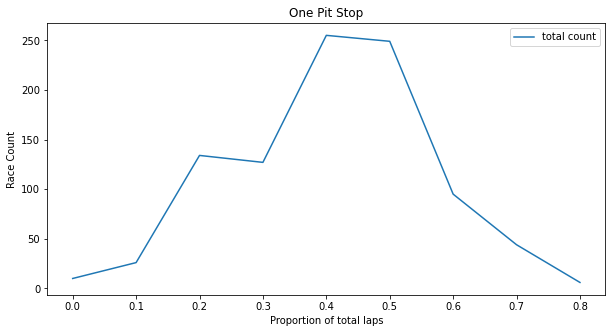

In [276]:
# plot for pit stop once 
fig, ax = plt.subplots(figsize=(10, 5))
pit_once_plot = pit_once_temp.groupby(by=['proportion']).count().reset_index()
# Add x-axis and y-axis
pit_once_plot.plot(x='proportion', y='laps', ax=ax)
# Set title and labels for axes
ax.set(xlabel='Proportion of total laps',
       ylabel='Race Count',
       title='One Pit Stop')
plt.legend(labels=['total count'])
plt.show()

In [ ]:
# plot for pit stop 2 


In [ ]:
pd.set_option('display.max_columns', None)

In [282]:
pd.set_option('display.max_rows', None)